In [22]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Flatten, Conv2D

In [23]:
mnist = keras.datasets.mnist


In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [26]:
y_train = tf.Variable(y_train, dtype="float32")
y_train = tf.reshape(y_train, shape=(60000, 1))
x_train = tf.Variable(x_train, dtype="float32")
x_train = tf.reshape(x_train, shape=(60000, 28, 28, 1))

In [27]:
print(y_train)

tf.Tensor(
[[5.]
 [0.]
 [4.]
 ...
 [5.]
 [6.]
 [8.]], shape=(60000, 1), dtype=float32)


In [28]:
def plotImage(imageArray):
    plt.imshow(imageArray)
    plt.show()
    pass

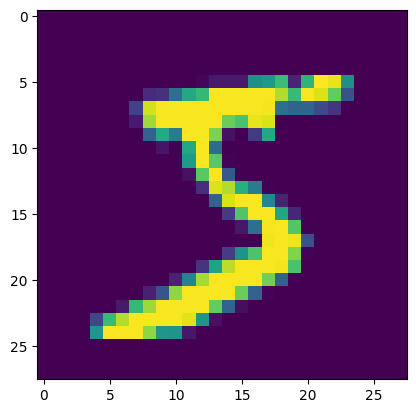

In [29]:
plotImage(x_train[0])

In [30]:
inputLayer = Input(shape=(28,28,1))
#flattenedLayer = Flatten()(inputLayer)
#hiddenLayer1 = Dense(units = 128, activation='relu')(flattenedLayer)
convLayer = Conv2D(kernel_size=(3,3), strides=(1,1), filters=32, activation='relu')(inputLayer)
flattenLayer = Flatten()(convLayer)
hiddenLayer2 = Dense(units = 128, activation='relu')(flattenLayer)
outputLayer = Dense(units=10, activation='softmax')(hiddenLayer2)

In [31]:
myModel = tf.keras.Model(inputs=inputLayer, outputs=outputLayer)
myModel.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 128)               2769024   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lossFunc = tf.keras.losses.sparse_categorical_crossentropy
myModel.compile(optimizer=optimizer, loss=lossFunc, metrics=["accuracy"])

In [34]:
myModel.fit(x=x_train, y=y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0494 - accuracy: 0.9848
Epoch 2/2
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0337 - accuracy: 0.9896


In [35]:
myModel.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.1473 - accuracy: 0.9690


[0.14733433723449707, 0.968999981880188]

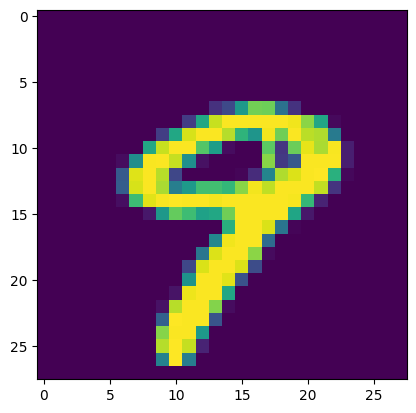

9


In [36]:
plotImage(x_test[9])
print(y_test[9])

In [ ]:
test = tf.expand_dims(tf.Variable(x_test[9], dtype='float32'),axis=0)
prediction = myModel(test)
print(prediction)

tf.Tensor(
[[2.8459371e-07 1.7014720e-07 5.6512326e-06 2.4583946e-06 5.7518767e-04
  1.5295255e-04 5.8718022e-12 3.9061374e-04 1.7088190e-05 9.9885559e-01]], shape=(1, 10), dtype=float32)


In [ ]:
print(tf.argmax(prediction, axis=1))

tf.Tensor([9], shape=(1,), dtype=int64)
